 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [117]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [118]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale = pd.read_csv (whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [119]:
whale.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [120]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [121]:
# Drop nulls
whale = whale.dropna()

whale.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [122]:
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [123]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo = pd.read_csv (algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo.head(10)
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [124]:
# Count nulls
algo.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [125]:
# Drop nulls
algo = algo.dropna()
algo.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    0
dtype: int64

In [126]:
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [127]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500 = pd.read_csv (sp500_history_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
#sp500 was given in reverse order, code below fixes that
sp500 = sp500[::-1]
sp500.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [128]:
# Check Data Types
sp500["Close"].dtype


dtype('O')

In [129]:
# Fix Data Types - Remove $ signs and change from string to float so we can do calculations later
sp500["Close"] = sp500["Close"].str.replace("$", "").astype(float)   
sp500.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [130]:
# Calculate Daily Returns - All portfolios except sp500 were given in daily returns.  Code below calculates daily returns for sp500
sp500["Close"] = sp500["Close"].pct_change()


In [131]:
# Drop nulls
sp500 = sp500.dropna()

sp500.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [132]:
# Rename Column

sp500 = sp500.rename(columns={"Close":"SP500"})
sp500.head()


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [133]:
# Concatenate all DataFrames into a single DataFrame
all_portfolios = pd.concat([whale,algo,sp500],axis="columns", join="inner")
#Rename Columns for readability, especially when plotting where longer names cause problems
all_portfolios = all_portfolios.rename(columns = {"SOROS FUND MANAGEMENT LLC": "Soros", "PAULSON & CO.INC." : "Paulson", "TIGER GLOBAL MANAGEMENT LLC" : "Tiger", "BERKSHIRE HATHAWAY INC": "Berkshire", "Algo 1" : "Algo_1","Algo 2": "Algo_2"})
#For some reason the rename function above does not work on Paulson, assume because of the "&" or ".".  Used line below to reference by index
all_portfolios.columns.values[1] = "Paulson"
all_portfolios.head()


,Soros,Paulson,Tiger,Berkshire,Algo_1,Algo_2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

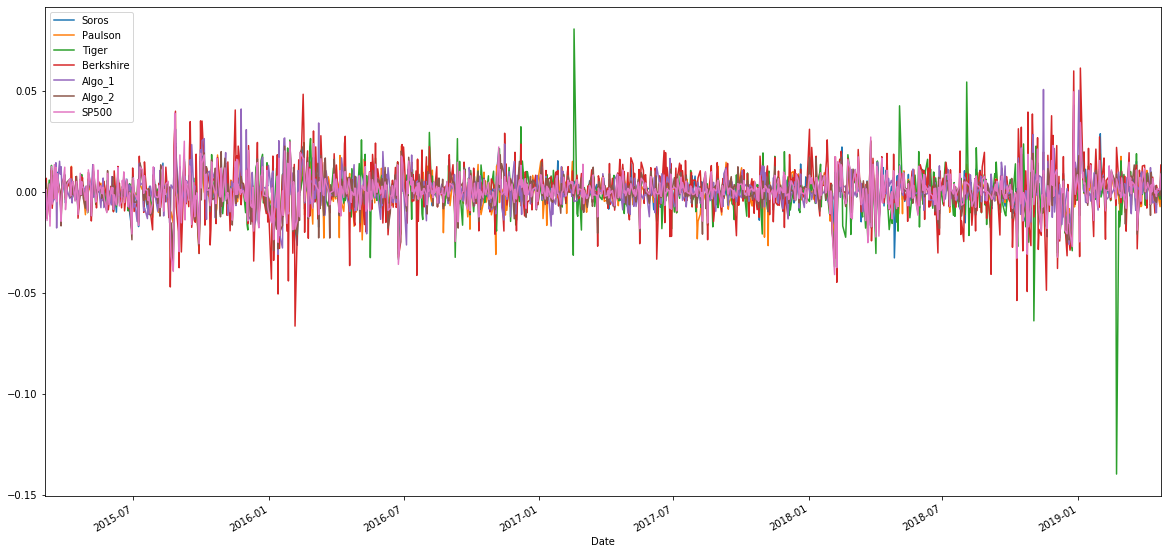

In [134]:
# Plot daily returns
all_portfolios.plot(figsize=(20,10))


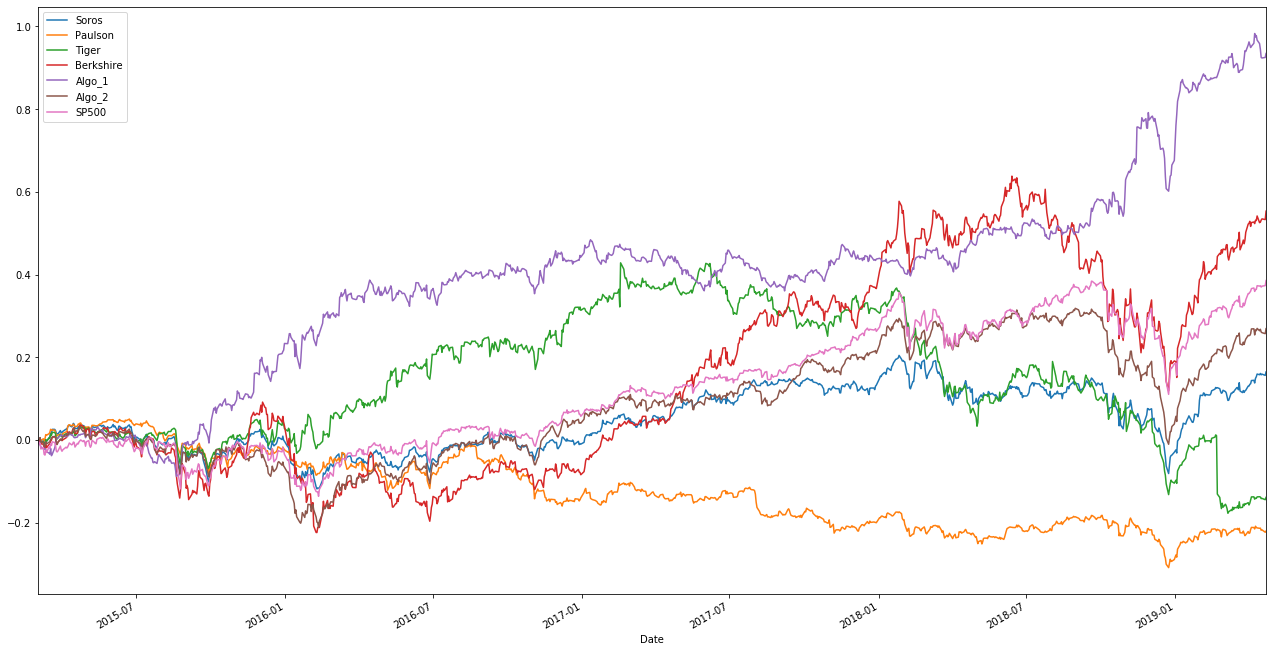

In [135]:
# Plot cumulative returns
all_portfolios_cumulative = (1 + all_portfolios).cumprod() - 1
all_portfolios_cumulative.plot(figsize = (22,12))
#all_portfolios_cumulative


---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [136]:
# Returns by Year
annual_returns = all_portfolios.resample('Y').apply(lambda x: (1+x).cumprod() -1)
#annual_returns = ((1 + all_portfolios_cumulative).cumprod()) - 1 
#all_portfolios_yearly = all_portfolios.groupby([all_portfolios.index.year]).apply(lambda x: (1+x).cumprod() -1)
#annual_returns = all_portfolios_yearly.groupby(all_portfolios_yearly.index.year).last()
annual_returns = annual_returns.resample('Y').last()
annual_returns
#annual_resample.last()

,Soros,Paulson,Tiger,Berkshire,Algo_1,Algo_2,SP500
Date,,,,,,,
2015-12-31,-0.003019,-0.023685,0.027644,0.034440,0.233385,-0.065759,-0.034689
2016-12-31,-0.006991,-0.119136,0.278194,-0.114539,0.169350,0.113744,0.095350
2017-12-31,0.144073,-0.069746,-0.000498,0.491562,-0.003228,0.162514,0.194200
2018-12-31,-0.143357,-0.111315,-0.317783,-0.128091,0.165843,-0.141432,-0.062373
2019-12-31,0.200247,0.096603,-0.038493,0.304057,0.154337,0.222163,0.170265


In [137]:
# Top Portfolio returns for 2017
returns_2017 = annual_returns.loc['2017-12-31'].sort_values(ascending = False)
returns_2017



Berkshire    0.491562
SP500        0.194200
Algo_2       0.162514
Soros        0.144073
Tiger       -0.000498
Algo_1      -0.003228
Paulson     -0.069746
Name: 2017-12-31 00:00:00, dtype: float64

In [145]:
# Returns by Month
returns_by_month = all_portfolios.resample('M').apply(lambda x: (1+x).cumprod() -1)
returns_by_month = returns_by_month.resample('M').last()
returns_by_month.head()

,Soros,Paulson,Tiger,Berkshire,Algo_1,Algo_2,SP500
Date,,,,,,,
2015-03-31,0.017207,0.011306,0.009419,0.002310,0.012788,-0.000962,-0.023378
2015-04-30,0.003248,0.016876,0.010373,0.011927,-0.007167,0.009620,0.008521
2015-05-31,0.008094,0.019797,-0.001410,0.001002,0.009439,0.000920,0.010491
2015-06-30,-0.020352,-0.011427,-0.023138,-0.020195,-0.003230,-0.009999,-0.021012
2015-07-31,-0.014779,-0.018293,0.020172,-0.021668,-0.051560,-0.016582,0.019742


In [144]:
# Top Portfolio Returns for December 2018
dec_2018_returns = returns_by_month.loc['2018-12-31'].sort_values(ascending=False)
dec_2018_returns
# YOUR CODE HERE

Algo_1      -0.055161
Berkshire   -0.089757
Paulson     -0.091320
SP500       -0.091777
Soros       -0.095657
Algo_2      -0.119221
Tiger       -0.144032
Name: 2018-12-31 00:00:00, dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [41]:
# Box plot to visually show risk
# YOUR CODE HERE

In [42]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [43]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [44]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [45]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

In [46]:
# Correlation
# YOUR CODE HERE

In [47]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [48]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [49]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [50]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [51]:
# Read the first stock
# YOUR CODE HERE

In [52]:
# Read the second stock
# YOUR CODE HERE

In [53]:
# Read the third stock
# YOUR CODE HERE

In [54]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [55]:
# Reset the index
# YOUR CODE HERE

In [56]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

In [57]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# YOUR CODE HERE

In [60]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [61]:
# Risk
# YOUR CODE HERE

In [62]:
# Rolling
# YOUR CODE HERE

In [63]:
# Beta
# YOUR CODE HERE

In [64]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [65]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [66]:
# YOUR CODE HERE